## Imports

In [1]:
import numpy as np 
import pandas as pd 
from pathlib import Path
import matplotlib.pyplot as plt

## Load Data

In [2]:
DATA_PATH = Path('./data')
PROTECTED_AREAS = DATA_PATH / 'OECD' / 'AIR_GHG.csv'

df = pd.read_csv(PROTECTED_AREAS)

## Data Exploration

In [3]:
df.columns

Index(['COU', 'Country', 'POL', 'Pollutant', 'VAR', 'Variable', 'YEA', 'Year',
       'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode',
       'Reference Period Code', 'Reference Period', 'Value', 'Flag Codes',
       'Flags'],
      dtype='object')

In [4]:
df.head()

,COU,Country,POL,Pollutant,VAR,Variable,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1990,1990,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,424998.381,NaN,NaN
1,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1991,1991,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,426015.210,NaN,NaN
2,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1992,1992,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,430216.380,NaN,NaN
3,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1993,1993,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,430612.556,NaN,NaN
4,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1994,1994,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,430653.332,NaN,NaN


In [5]:
df.Country.unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland',
       'Turkey', 'United Kingdom', 'United States', 'Chile', 'Estonia',
       'Israel', 'Russia', 'Slovenia', 'Latvia', 'Lithuania',
       'OECD - Total', 'OECD - Europe', 'Brazil',
       "China (People's Republic of)", 'Colombia', 'Costa Rica', 'India',
       'Indonesia', 'South Africa', 'Argentina',
       'European Union (28 countries)'], dtype=object)

In [6]:
df.describe()

,YEA,Year,PowerCode Code,Reference Period Code,Reference Period,Value
count,52578.000000,52578.000000,52578.000000,0.0,0.0,5.257800e+04
mean,2003.962741,2003.962741,1.434726,NaN,NaN,1.421543e+05
std,8.258551,8.258551,1.498593,NaN,NaN,1.652310e+06
min,1990.000000,1990.000000,0.000000,NaN,NaN,-1.479158e+06
25%,1997.000000,1997.000000,0.000000,NaN,NaN,1.718825e+01
50%,2004.000000,2004.000000,0.000000,NaN,NaN,1.014720e+02
75%,2011.000000,2011.000000,3.000000,NaN,NaN,7.697484e+03
max,2018.000000,2018.000000,3.000000,NaN,NaN,9.731788e+07


## Resolve Power

In [7]:
df.Value = df.Value * 10 **  df['PowerCode Code']

## Filter only for totals

In [8]:
df = df[df['VAR'] == 'TOTAL']

## Drop Estimates

In [9]:
df = df[df['Flag Codes'].isnull()]

## Delete unneaded columns

In [10]:
df = df.drop(labels=['COU','Pollutant', 'VAR', 'Variable', 'Year', 'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode', 'Reference Period Code', 'Reference Period', 'Flag Codes', 'Flags'], axis=1)

## Transform data into years

In [11]:
df = df.pivot(index=['Country', 'POL'], columns='YEA', values=['Value']).reset_index()

df['2019'] = np.NaN
df['2020'] = np.NaN

## Extract Polution Type

In [12]:
CH4 = df[df['POL'] == 'CH4']
CO2 = df[df['POL'] == 'CO2']
HFC = df[df['POL'] == 'HFC']
HFC_PFC = df[df['POL'] == 'HFC_PFC']
N2O = df[df['POL'] == 'N2O']
NF3 = df[df['POL'] == 'NF3']
PFC = df[df['POL'] == 'PFC']
SF6 = df[df['POL'] == 'SF6']

In [13]:
CH4 = CH4.drop(labels=['POL'], axis=1)
CO2 = CO2.drop(labels=['POL'], axis=1)
HFC = HFC.drop(labels=['POL'], axis=1)
HFC_PFC = HFC_PFC.drop(labels=['POL'], axis=1)
N2O = N2O.drop(labels=['POL'], axis=1)
NF3 = NF3.drop(labels=['POL'], axis=1)
PFC = PFC.drop(labels=['POL'], axis=1)
SF6 = SF6.drop(labels=['POL'], axis=1)

In [14]:
CH4

Country        Value                            \
YEA                                        1990         1991         1992   
0                        Argentina   79891495.0   81249739.0   82508600.0   
7                        Australia  124383179.0  124308869.0  123741408.0   
14                         Austria   10391460.0   10266593.0    9981653.0   
22                         Belgium   12215185.0   12178671.0   12099242.0   
30                          Brazil  235600000.0  241605000.0  245385000.0   
36                          Canada   90484948.0   92223156.0   96534414.0   
44                           Chile   12894522.0   12701470.0   12840843.0   
51    China (People's Republic of)          NaN          NaN          NaN   
58                        Colombia   28896681.0   29451397.0   30510787.0   
64                      Costa Rica          NaN          NaN          NaN   
70                  Czech Republic   23527890.0   21959707.0   20623320.0   
78                         Denmark    7941910.0    8126701.0    8196321.0   
85                         Estonia    1901294.0    1822659.0    1581387.0   
92   European Union (28 countries)  728946903.0  707433056.0  692025167.0   
101                        Finland    7684617.0    7666524.0    7617082.0   
108                         France   69877298.0   70584192.0   70409649.0   
116                        Germany  121192505.0  115019177.0  111435381.0   
125                         Greece   11042244.0   11040952.0   11116916.0   
132                        Hungary   11721796.0   11452915.0   10152193.0   
139                        Iceland     610589.0     607952.0     618598.0   
146                          India          NaN          NaN          NaN   
153                      Indonesia          NaN          NaN          NaN   
158                        Ireland   14760690.0   14940446.0   15053108.0   
166                         Israel          NaN          NaN          NaN   
173                          Italy   48247489.0   49126548.0   48977048.0   
182                          Japan   44418487.0   43259723.0   44118705.0   
190                          Korea   30173000.0   30117000.0   29546000.0   
197                         Latvia    3594968.0    3549434.0    3059078.0   
203                      Lithuania    7006002.0    6795421.0    5927340.0   
210                     Luxembourg     581647.0     594130.0     578369.0   
216                         Mexico   91402383.0   90952391.0   90648272.0   
223                    Netherlands   31847214.0   32252801.0   31864094.0   
230                    New Zealand   32287604.0   32412238.0   32038280.0   
237                         Norway    6032026.0    5977406.0    6051542.0   
246                         Poland   69796962.0   64910218.0   63104595.0   
253                       Portugal    9590332.0    9712391.0    9761921.0   
260                         Russia  463735661.0  441113482.0  412866314.0   
268                Slovak Republic    7255124.0    6957445.0    6323843.0   
275                       Slovenia    2543980.0    2448476.0    2465380.0   
282                   South Africa   43114900.0          NaN          NaN   
286                          Spain   35609222.0   34473566.0   35176189.0   
294                         Sweden    7418850.0    7415061.0    7549989.0   
301                    Switzerland    6044117.0    5973043.0    5890169.0   
309                         Turkey   42405060.0   43285364.0   43193125.0   
316                 United Kingdom  133060432.0  133811581.0  133490723.0   
324                  United States  774409534.0  778860543.0  777754009.0   

                                                                      \
YEA         1993         1994         1995         1996         1997   
0     84032371.0   82759523.0   82218785.0   81887924.0   80084465.0   
7    120117915.0  116834942.0  115158282.0  115355759.0  118199041.0   
14     9897410.0    9607558.0    9530406.0

In [15]:
CO2

Country         Value                              \
YEA                                         1990          1991          1992   
1                        Argentina  1.009327e+08  1.097654e+08  1.123084e+08   
8                        Australia  2.784247e+08  2.798727e+08  2.849124e+08   
15                         Austria  6.212470e+07  6.572553e+07  6.020407e+07   
23                         Belgium  1.203093e+08  1.233821e+08  1.225078e+08   
31                          Brazil  2.215000e+08  2.340310e+08  2.369690e+08   
37                          Canada  4.621174e+08  4.524947e+08  4.670374e+08   
45                           Chile  3.349013e+07  3.236088e+07  3.389099e+07   
52    China (People's Republic of)           NaN           NaN           NaN   
59                        Colombia  4.631909e+07  4.886369e+07  5.272478e+07   
65                      Costa Rica           NaN           NaN           NaN   
71                  Czech Republic  1.642042e+08  1.488941e+08  1.446190e+08   
79                         Denmark  5.484567e+07  6.542835e+07  5.959559e+07   
86                         Estonia  3.690724e+07  3.390178e+07  2.437046e+07   
93   European Union (28 countries)  4.466228e+09  4.413594e+09  4.271809e+09   
102                        Finland  5.697187e+07  5.523040e+07  5.428553e+07   
109                         France  4.033072e+08  4.289271e+08  4.182310e+08   
117                        Germany  1.052349e+09  1.014200e+09  9.658898e+08   
126                         Greece  8.342555e+07  8.340112e+07  8.498271e+07   
133                        Hungary  7.346485e+07  6.978452e+07  6.241594e+07   
140                        Iceland  2.247803e+06  2.128410e+06  2.274267e+06   
147                          India           NaN           NaN           NaN   
154                      Indonesia           NaN           NaN           NaN   
159                        Ireland  3.294433e+07  3.367401e+07  3.349493e+07   
167                         Israel           NaN           NaN           NaN   
174                          Italy  4.380088e+08  4.375386e+08  4.378298e+08   
183                          Japan  1.158391e+09  1.170066e+09  1.179740e+09   
191                          Korea  2.519920e+08  2.748510e+08  2.997350e+08   
198                         Latvia  1.950413e+07  1.778312e+07  1.407983e+07   
204                      Lithuania  3.577182e+07  3.785159e+07  2.120058e+07   
211                     Luxembourg  1.184764e+07  1.246579e+07  1.223216e+07   
217                         Mexico  3.150318e+08  3.240105e+08  3.268404e+08   
224                    Netherlands  1.623851e+08  1.707964e+08  1.706302e+08   
231                    New Zealand  2.544629e+07  2.611038e+07  2.810508e+07   
238                         Norway  3.532133e+07  3.381646e+07  3.473475e+07   
247                         Poland  3.765465e+08  3.737933e+08  3.646779e+08   
254                       Portugal  4.508297e+07  4.696026e+07  5.088917e+07   
261                         Russia  2.525294e+09  2.395978e+09  1.957659e+09   
269                Slovak Republic  6.163346e+07  5.343790e+07  4.902914e+07   
276                       Slovenia  1.509384e+07  1.400124e+07  1.400675e+07   
283                   South Africa  2.809318e+08           NaN           NaN   
287                          Spain  2.312136e+08  2.409530e+08  2.498132e+08   
295                         Sweden  5.734882e+07  5.770722e+07  5.745149e+07   
302                    Switzerland  4.415442e+07  4.613382e+07  4.600970e+07   
310                         Turkey  1.515085e+08  1.579820e+08  1.639222e+08   
317                 United Kingdom  6.011872e+08  6.092660e+08  5.937460e+08   
325                  United States  5.128301e+09  5.078890e+09  5.182707e+09   

                                                                           \
YEA          1993          1994          1995          1996          1997   
1    1.145207e+08  1.203216e+08 

## Check if 2020 can be auto filled

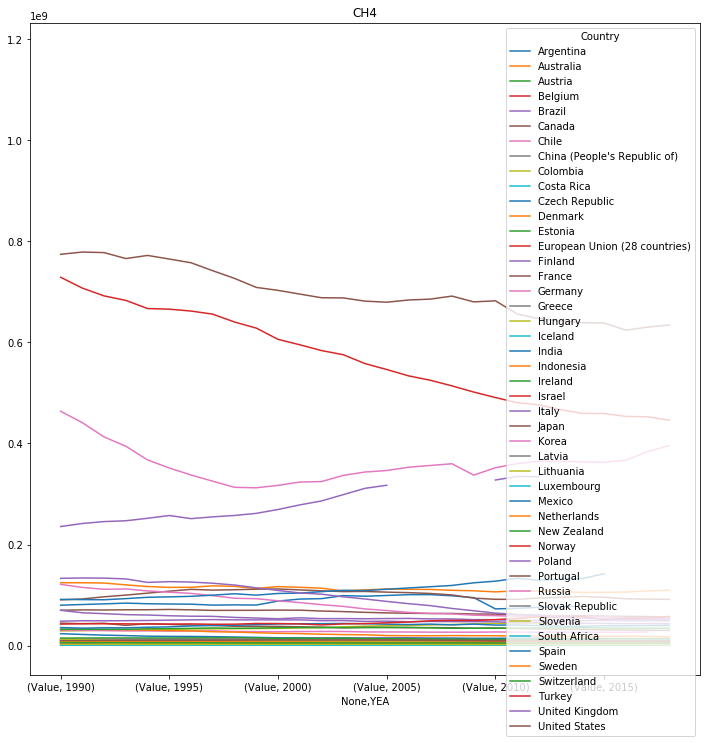

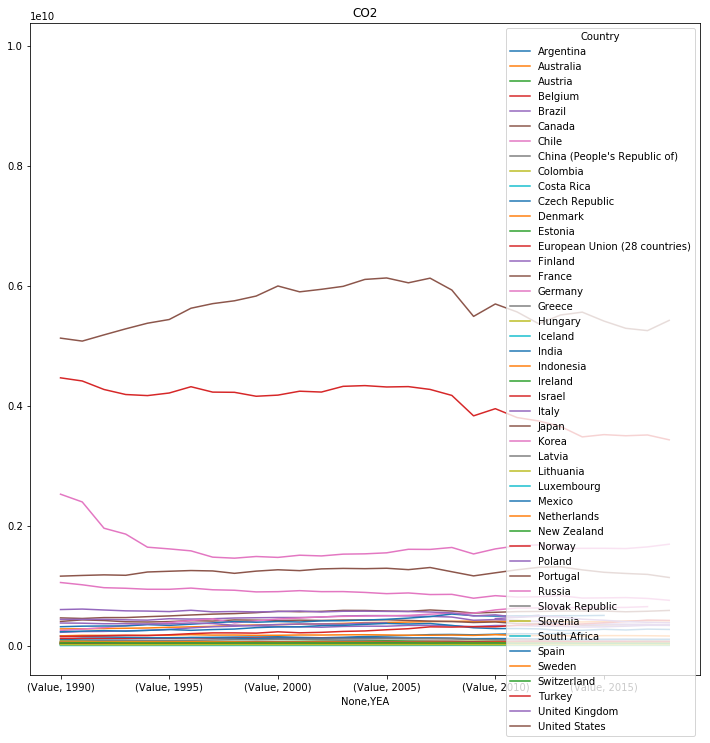

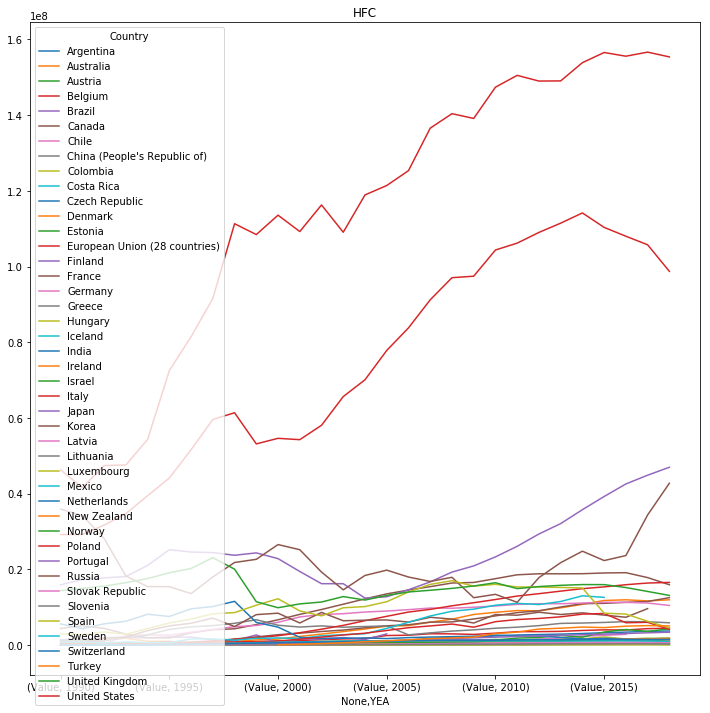

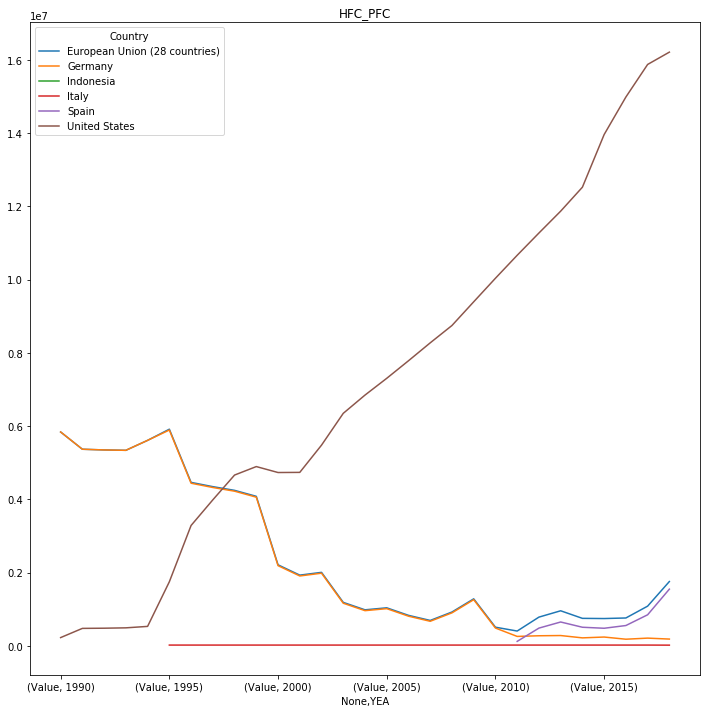

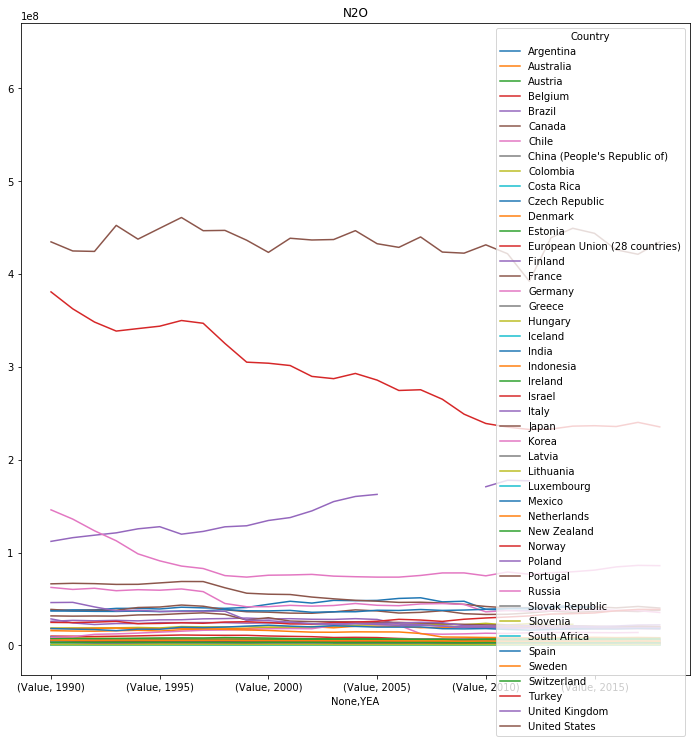

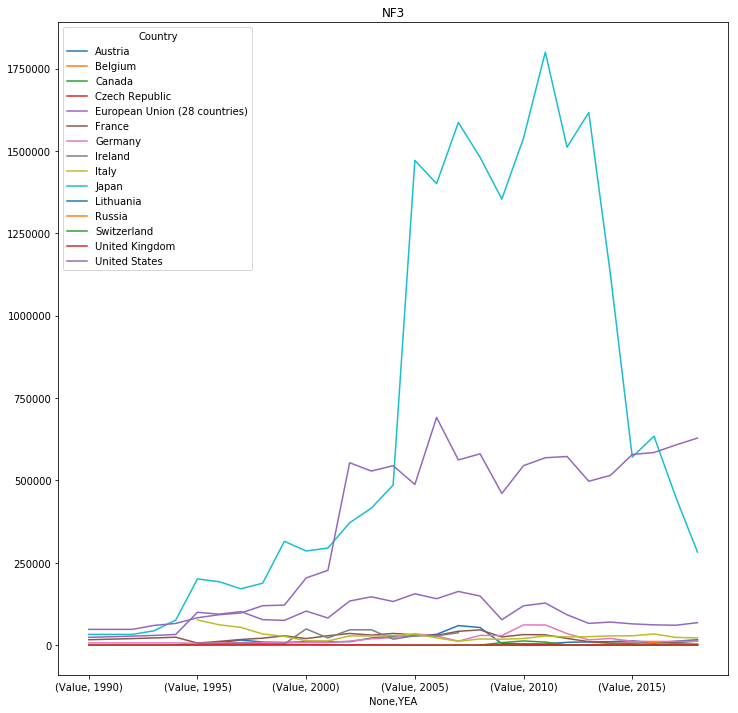

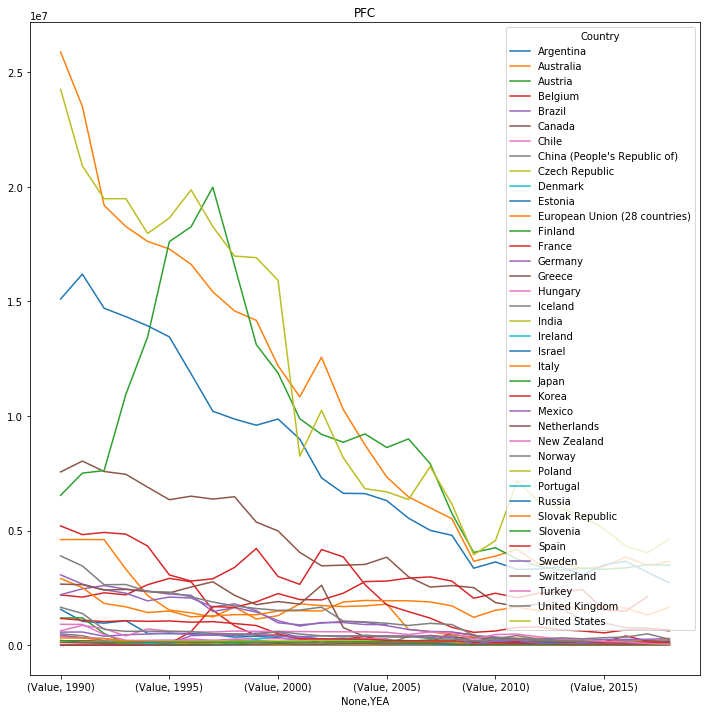

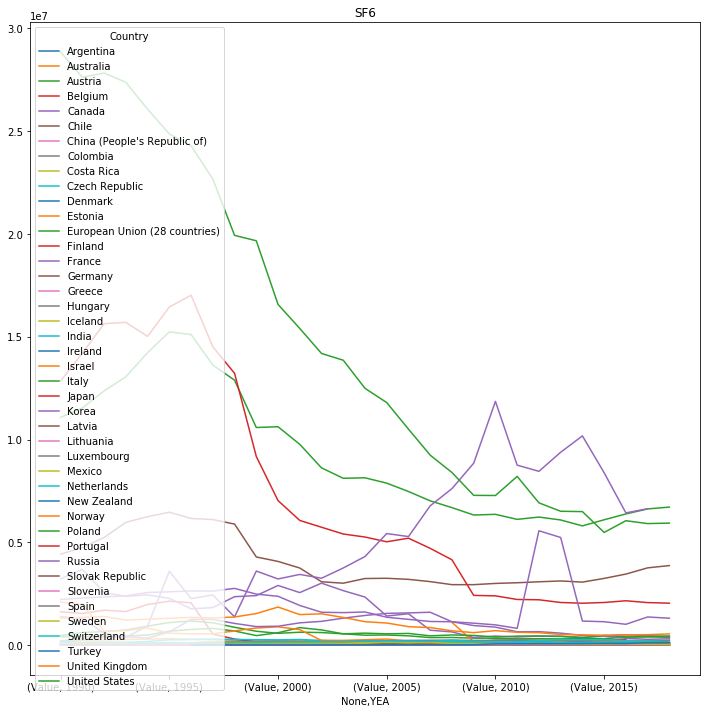

In [16]:
CH4.set_index('Country').transpose().plot(figsize=(12,12), title='CH4')
CO2.set_index('Country').transpose().plot(figsize=(12,12), title='CO2')
HFC.set_index('Country').transpose().plot(figsize=(12,12), title='HFC')
HFC_PFC.set_index('Country').transpose().plot(figsize=(12,12), title='HFC_PFC')
N2O.set_index('Country').transpose().plot(figsize=(12,12), title='N2O')
NF3.set_index('Country').transpose().plot(figsize=(12,12), title='NF3')
PFC.set_index('Country').transpose().plot(figsize=(12,12), title='PFC')
SF6.set_index('Country').transpose().plot(figsize=(12,12), title='SF6')

## Autofill 2020

In [17]:
CH4 = CH4.transpose().fillna(method='ffill').transpose()
CO2 = CO2.transpose().fillna(method='ffill').transpose()
HFC = HFC.transpose().fillna(method='ffill').transpose()
HFC_PFC = HFC_PFC.transpose().fillna(method='ffill').transpose()
N2O = N2O.transpose().fillna(method='ffill').transpose()
NF3 = NF3.transpose().fillna(method='ffill').transpose()
PFC = PFC.transpose().fillna(method='ffill').transpose()
SF6 = SF6.transpose().fillna(method='ffill').transpose()

In [18]:
conc = [
    CH4[['Country', '2020']].set_index('Country'),
    CO2[['Country', '2020']].set_index('Country'),
    HFC[['Country', '2020']].set_index('Country'),
    HFC_PFC[['Country', '2020']].set_index('Country'),
    N2O[['Country', '2020']].set_index('Country'),
    NF3[['Country', '2020']].set_index('Country'),
    PFC[['Country', '2020']].set_index('Country'),
    SF6[['Country', '2020']].set_index('Country'),
]

res = pd.concat(conc, axis=1, join='outer')

In [19]:
res.columns = ['CH4', 'CO2', 'HFC', 'HFC_PFC', 'N2O', 'NF3', 'PFC', 'SF6']
res

,CH4,CO2,HFC,HFC_PFC,N2O,NF3,PFC,SF6
Country,,,,,,,,
Argentina,78036572.0,200983616.0,613176.0,NaN,42759706.0,NaN,159765.0,1777.0
Australia,109532210.0,415953947.0,11982082.0,NaN,20114445.0,NaN,236003.0,228533.0
Austria,6438632.0,66719678.0,1834759.0,NaN,3526083.0,16512.0,32519.0,382154.0
Belgium,7848735.0,100207836.0,4469837.0,NaN,5702287.0,646.0,131321.0,95076.0
Brazil,333800000.0,508985000.0,2966600.0,NaN,177300000.0,NaN,898000.0,NaN
Canada,91424111.0,586504635.0,12545434.0,NaN,37944542.0,120.0,621033.0,309396.0
Chile,13937687.0,87889339.0,2869460.0,NaN,6708750.0,NaN,0.0,272268.0
China (People's Republic of),1173900000.0,9893257000.0,154518000.0,NaN,638600000.0,NaN,11590000.0,23900000.0
Colombia,45121104.0,80619282.0,1890728.0,NaN,22827007.0,NaN,NaN,156640.0
